## <center> CNN - Flower Power III </center>

#### Bird's-foot Trefoil, Brown Knapweed, Buttercup(Creeping & Meadow), Chamomile, Common Dandelion, Common Poppy, Cornflower, Cow Parsley, Cuckooflower, Field Mouse-ear, Flatweed, Hare's-foot clover, Health Spotted Orchid, Hoary Alyssum, Lesser Spearwort, Marsh Lousewort, Marsh marigold, Meadow Thistle, Ox-eye Daisy, Perforate St John's-wort, Purple Loosestrife, Ragwort, Red Clover, Redstem Filaree, Southern Marsh Orchid, Tansy, Wild Carrot, White Clover, Yarrow, Yellow Loosestrife

The third option when training the 30 species of cropped flowers is to use a pre-trained model. Below, we have used the MobileNet V2 model (https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/3) and a feature vector which gives all layers except the last one (https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/3).

### 1. Imports

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.utils import to_categorical

import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, ReduceLROnPlateau

import itertools
from sklearn.metrics import confusion_matrix

In [2]:
x = [] # Feature dataset with images
y = [] # Target dataset with labels


folder_dir = './Flower-Data_CNN'
size = (224,224) #Crop the image to 224x224
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("JPG"):
            y.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (size))
            x.append(im)
        else:
            continue

In [3]:
# having the model ready
classifier = tf.keras.Sequential ([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/3", input_shape = size +(3,))
]) 

In [4]:
# split the dataset into 80% training and 20% test sets:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [5]:
# take a look at one of the images:
X_train[0]

array([[[137, 157, 152],
        [182, 198, 197],
        [185, 199, 199],
        ...,
        [  9,  14,  11],
        [ 19,  28,  27],
        [ 22,  34,  32]],

       [[185, 204, 198],
        [160, 175, 172],
        [172, 190, 188],
        ...,
        [ 15,  21,  17],
        [ 20,  30,  29],
        [ 20,  32,  30]],

       [[173, 191, 185],
        [172, 195, 189],
        [165, 190, 186],
        ...,
        [ 20,  29,  24],
        [ 17,  29,  27],
        [ 19,  32,  30]],

       ...,

       [[ 70, 107, 136],
        [ 66, 103, 133],
        [ 62, 100, 128],
        ...,
        [ 57,  95,  98],
        [ 72, 105, 110],
        [ 98, 129, 139]],

       [[ 38,  62,  83],
        [ 36,  57,  77],
        [ 34,  54,  72],
        ...,
        [ 55,  90,  94],
        [ 74, 105, 107],
        [ 85, 114, 118]],

       [[ 13,  27,  30],
        [ 12,  25,  25],
        [ 16,  26,  25],
        ...,
        [ 67,  98, 101],
        [ 71, 100, 102],
        [ 62,  90,  93]]

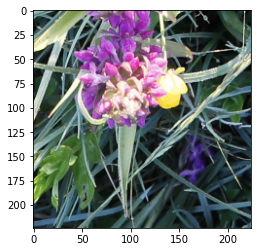

In [6]:
img = plt.imshow(X_train[0])

In [7]:
y_train[0]

'Southern Marsh Orchid'

In [8]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [9]:
y_train

array([24,  3,  1, ...,  5, 20,  5], dtype=int64)

In [10]:
X_train = np.array(X_train)/255
X_test= np.array(X_test)/255
X_train

array([[[[0.5372549 , 0.61568627, 0.59607843],
         [0.71372549, 0.77647059, 0.77254902],
         [0.7254902 , 0.78039216, 0.78039216],
         ...,
         [0.03529412, 0.05490196, 0.04313725],
         [0.0745098 , 0.10980392, 0.10588235],
         [0.08627451, 0.13333333, 0.1254902 ]],

        [[0.7254902 , 0.8       , 0.77647059],
         [0.62745098, 0.68627451, 0.6745098 ],
         [0.6745098 , 0.74509804, 0.7372549 ],
         ...,
         [0.05882353, 0.08235294, 0.06666667],
         [0.07843137, 0.11764706, 0.11372549],
         [0.07843137, 0.1254902 , 0.11764706]],

        [[0.67843137, 0.74901961, 0.7254902 ],
         [0.6745098 , 0.76470588, 0.74117647],
         [0.64705882, 0.74509804, 0.72941176],
         ...,
         [0.07843137, 0.11372549, 0.09411765],
         [0.06666667, 0.11372549, 0.10588235],
         [0.0745098 , 0.1254902 , 0.11764706]],

        ...,

        [[0.2745098 , 0.41960784, 0.53333333],
         [0.25882353, 0.40392157, 0.52156863]

### 3. Model

In [11]:
# the feature vector gives all the layers except the last one 
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/3"

In [12]:
# trainable false means freeze, do not train (all the layers will have their fixed weights)
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [13]:
num_of_flowers = 30

# create the last layer 
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 30)                38430     
Total params: 2,296,414
Trainable params: 38,430
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True)

reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001)

In [15]:
# Train the model
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs= 10, validation_split=0.2, verbose = 1, callbacks = [reduce_lr, checkpoint])

Epoch 1/10
134/134 [==============================] - 66s 464ms/step - loss: 1.0840 - accuracy: 0.7687 - val_loss: 0.3940 - val_accuracy: 0.9355

Epoch 00001: val_loss improved from inf to 0.39403, saving model to model.h5
Epoch 2/10
134/134 [==============================] - 56s 420ms/step - loss: 0.2491 - accuracy: 0.9652 - val_loss: 0.2267 - val_accuracy: 0.9636

Epoch 00002: val_loss improved from 0.39403 to 0.22670, saving model to model.h5
Epoch 3/10
134/134 [==============================] - 56s 417ms/step - loss: 0.1450 - accuracy: 0.9818 - val_loss: 0.1767 - val_accuracy: 0.9692

Epoch 00003: val_loss improved from 0.22670 to 0.17670, saving model to model.h5
Epoch 4/10
134/134 [==============================] - 57s 428ms/step - loss: 0.0988 - accuracy: 0.9920 - val_loss: 0.1393 - val_accuracy: 0.9729

Epoch 00004: val_loss improved from 0.17670 to 0.13933, saving model to model.h5
Epoch 5/10
134/134 [==============================] - 61s 454ms/step - loss: 0.0708 - accuracy: 

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


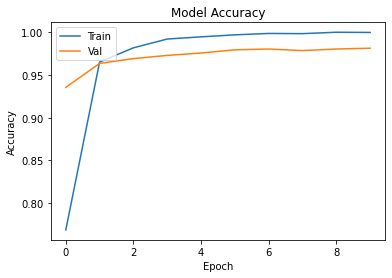

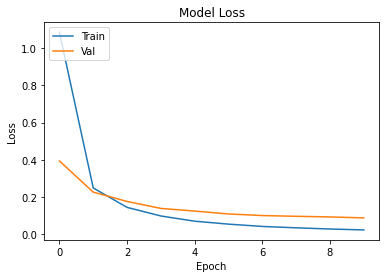

In [17]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [18]:
# Prediction
predict_model = model.predict(np.array(X_train))
predict_model = np.argmax(predict_model, axis=1)
predict_model

array([24,  3,  1, ...,  5, 20,  5], dtype=int64)

In [19]:
cm = confusion_matrix(y_true = y_train, y_pred = predict_model)

In [20]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
cm_plot_labels = ['Bird\'s-foot Trefoil', 'Brown Knapweed', 'Buttercup', 'Chamomile', 'Common Dandelion', 'Common Poppy', 'Cornflower', 'Cow Parsley',
                             'Cuckooflower', 'Field Mouse-ear', 'Flatweed', 'Hares-foot clover', 'Health Spotted Orchid', 'Hoary Alyssum', 'Lesser Spearwort', 
                             'Marsh Lousewort', 'Marsh marigold', 'Meadow Thistle', 'Ox-eye Daisy', 'Perforate St John\'s-wort', 'Purple Loosestrife','Ragwort', 'Red Clover', 'Redstem Filaree',
                             'Southern Marsh Orchid', 'Tansy', 'White Clover', 'Wild Carrot', 'Yarrow', 'Yellow Loosestrife']

Confusion matrix, without normalization
[[177   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 190   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0 194   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 159   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 176   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 187   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 194   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 187   0   0   0   0   0   0   0   0   0   0
    0   0  

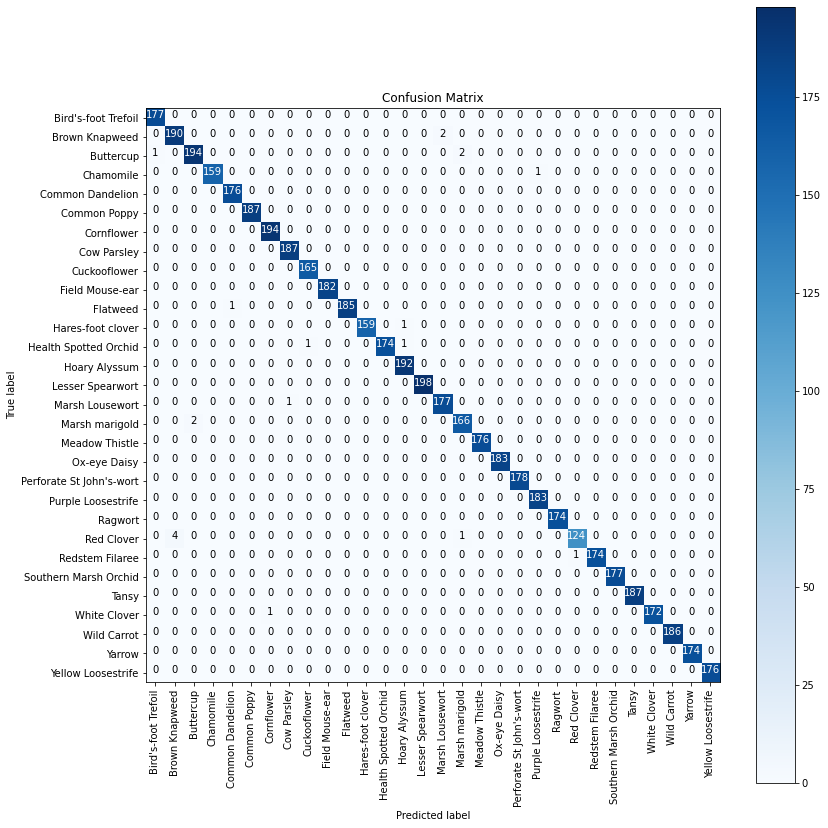

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### 4. Evaluation

In [23]:
y_test_one_hot = tf.one_hot(y_test, depth=30)

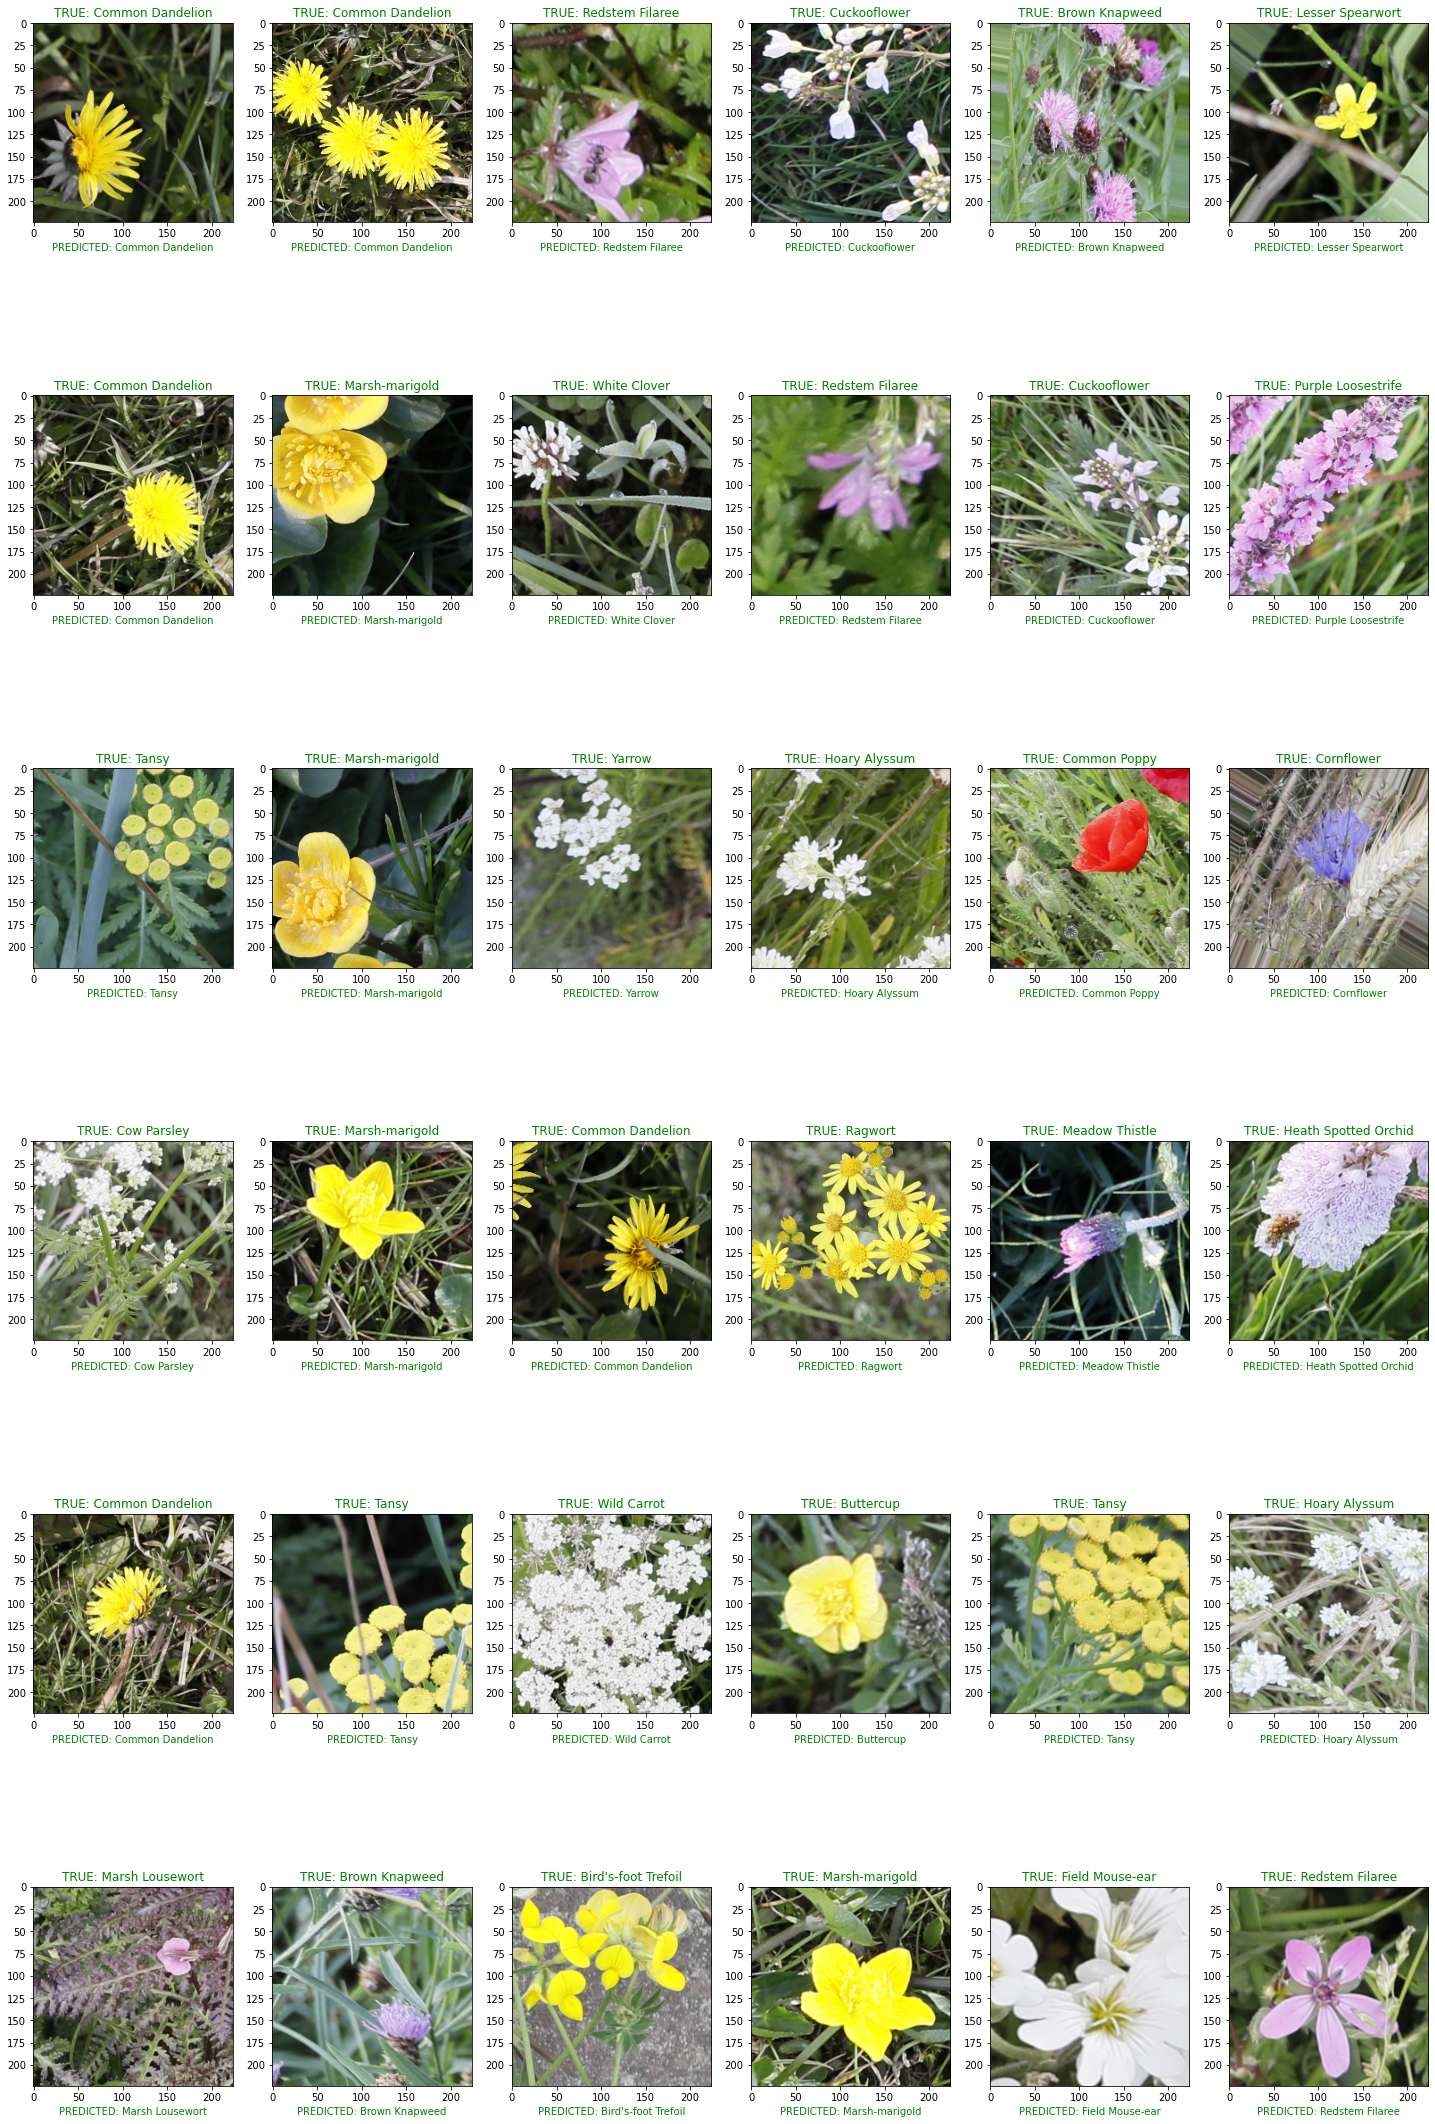

In [24]:
categories = np.sort(os.listdir(folder_dir))
size = 224
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test_one_hot[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')